In [1]:
import torch
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
import japanize_matplotlib
import torch.nn as nn
import torch.optim as optim

In [2]:
data_path = "../data/p1ch7/"

cifar10 = datasets.CIFAR10(
    data_path,
    train=True, 
    download=False,
    transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2470, 0.2435, 0.2616))
]))

cifar10_val = datasets.CIFAR10(
    data_path,
    train=False,
    download=False,
    transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2470, 0.2435, 0.2616))
]))

In [3]:
label_map = {0: 0, 2: 1}
class_names = ["airplane", "bird"]

cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]

cifar2_val = [(img, label_map[label])
          for img, label in cifar10_val
          if label in [0, 2]]

全結合モデル

In [4]:
n_out = 2
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out)
)

出力を確率として表現

In [5]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [6]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.Softmax(dim=1),
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


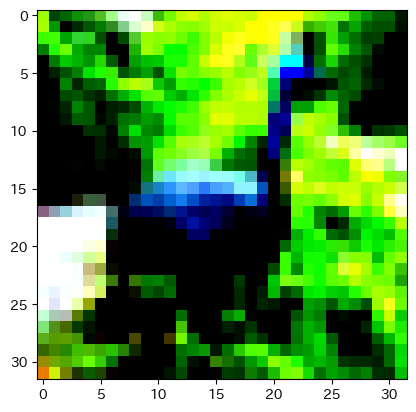

In [7]:
img, _ = cifar2[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()

1枚の画像の入力データのサイズを作成
nn.Moduleは0次元目にバッチを表すデータに対して動作する

In [8]:
img_batch = img.view(-1).unsqueeze(0)
img_batch.shape

torch.Size([1, 3072])

画像1枚を予測

In [9]:
out = model(img_batch)
out

tensor([[0.5154, 0.4846]], grad_fn=<SoftmaxBackward0>)

In [10]:
_, index = torch.max(out, dim=1)
_, index

(tensor([0.5154], grad_fn=<MaxBackward0>), tensor([0]))

In [11]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

In [12]:
loss = nn.NLLLoss() # クロスエントロピー誤差

In [13]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.7280, grad_fn=<NllLossBackward0>)

In [14]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 10

correct = 0
total = 0

for epoch in range(1, n_epochs + 1):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, torch.tensor(labels))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
    print(f'Epoch: {epoch}, Loss: {float(loss)}')

print(f'Accuracy: {(correct / total)*100} %')

/tmp/ipykernel_272467/4179494392.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = loss_fn(outputs, torch.tensor(labels))


Epoch: 1, Loss: 0.5472704768180847
Epoch: 2, Loss: 0.4947815537452698
Epoch: 3, Loss: 0.3152093291282654
Epoch: 4, Loss: 0.24950625002384186
Epoch: 5, Loss: 0.5051575303077698
Epoch: 6, Loss: 0.28740745782852173
Epoch: 7, Loss: 0.5287520885467529
Epoch: 8, Loss: 0.49372172355651855
Epoch: 9, Loss: 0.31146708130836487
Epoch: 10, Loss: 0.4403303265571594
Accuracy: 81.101 %


In [20]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1)) # (64, 3072)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((labels == predicted).sum())

print(f'Accuracy: {(correct / total)*100} %')

torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([64, 3072])
torch.Size([16, 3072])
Accuracy: 78.60000000000001 %


モデルのパラメータの数を確認

In [16]:
numel_list = [p.numel() for p in model.parameters()
            if p.requires_grad == True]

sum(numel_list)

1574402